In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime
import re

warnings.filterwarnings('ignore')
%matplotlib inline

In [230]:
holidays = pd.read_excel("holidays.xlsx")
print(holidays.columns)

Index(['Date', 'Country', 'Holiday'], dtype='object')


In [99]:
holidays.head()

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag


In [30]:
re.search(".*\[(.*)\].*", holidays['Holiday'])

TypeError: expected string or bytes-like object

In [231]:
def get_holiday_name (holiday):
    if re.search("\[(.*)\]", holiday):
        holiday = re.search("\[(.*)\]", holiday).group(1)
    
    holiday = re.sub("[0-9\.]", "", holiday).lower()
    holiday = holiday.replace("\"", "") \
                     .replace("}", "") \
                     .replace("d josé de san martin", "") \
                     .replace("d manuel belgrano", "") \
                     .replace("martín miguel de güemes", "") \
                     .replace("nytårsdag", "new years day") \
                     .replace("skærtorsdag", "maundy thursday") \
                     .replace("påskedag", "easter") \
                     .replace("anden easter", "easter") \
                     .replace("kristi himmelfartsdag", "ascension of jesus") \
                     .replace("helatorstai", "ascension of jesus") \
                     .replace("pinsedag", "Pentecost") \
                     .replace("pinksteren", "Pentecost") \
                     .replace("helluntaipäivä", "Pentecost") \
                     .replace("pinkstermaandag", "Pentecost") \
                     .replace("anden pentecost", "Pentecost") \
                     .replace("juledag", "christmas") \
                     .replace("kerstmis", "christmas") \
                     .replace("jouluaatto", "christmas") \
                     .replace("joulupäivä", "christmas") \
                     .replace("anden christmas", "boxing day") \
                     .replace("nieuwjaarsdag", "new years day") \
                     .replace("uudenvuodenpäivä", "new years day") \
                     .replace("pasen", "easter") \
                     .replace("pääsiäispäivä", "easter") \
                     .replace("paasmaandag", "easter") \
                     .replace("olh hemelvaart", "ascension of jesus") \
                     .replace("langfredag", "good friday") \
                     .replace("pitkäperjantai", "good friday") \
                     .replace("loppiainen", "epiphany") \
                     .replace("pyhäinpäivä", "all saints day") \
                     .replace("dag van de arbeid", "labour day") \
                     .replace("vappu", "labour day") \
                     .replace("juhannusaatto", "midsummer") \
                     .replace("juhannuspäivä", "midsummer") \
                     .replace("day", "") 
                     

    return holiday.lower().strip()

In [234]:
holidays['Holiday'] = holidays['Holiday'].apply(get_holiday_name)

In [235]:
print(len(holidays['Holiday'].unique()))
holidays['Holiday'].unique()

43


array(['new years', 'maundy thurs', 'good fri', 'easter', 'store bededag',
       'ascension of jesus', 'pentecost', 'christmas', 'boxing', 'labour',
       'nationale feestdag', 'olv hemelvaart', 'allerheiligen',
       'wapenstilstand', 'carnivals',
       'memorys national  for the truth and justice', 'semana santa',
       'veterans and the fallen in the malvinas war', 'may revolution',
       'pass to the immortality of general', 'independence',
       'respect for cultural diversity', 'national sovereignty',
       'immaculate conception', 'battle of boyacá', 'epiphany',
       'saint josephs', 'sacred heart', 'assumption of mary',
       'discovery of america', 'all saints', 'independence of cartagena',
       'corpus christi', 'saint peter and saint paul', 'easter mon',
       'may', 'spring bank holi', 'late summer bank holi',
       'diamond jubilee of elizabeth ii',
       'wedding of william and catherine', 'midsummer',
       'itsenäisyyspäivä', 'tapaninpäivä'], dtype=obje

In [239]:
def parse_date(item):
    return datetime.strptime(item, '%Y, %m, %d')

holidays['parsedDate'] = holidays['Date'].apply(parse_date)

In [240]:
holidays['Year'] = pd.DatetimeIndex(holidays['parsedDate']).year
holidays['Month'] = pd.DatetimeIndex(holidays['parsedDate']).month
holidays['Day'] = pd.DatetimeIndex(holidays['parsedDate']).day

In [241]:
holidays[(holidays.Month>=0) & (holidays.Day>=0)].groupby(['Month', 'Holiday']).count()

Date  Country  parsedDate  \
Month Holiday                                                                  
1     epiphany                                       16       16          16   
      new years                                      48       48          48   
2     carnivals                                      12       12          12   
3     carnivals                                       4        4           4   
      easter                                         11       11          11   
      easter mon                                      1        1           1   
      good fri                                       12       12          12   
      maundy thurs                                    6        6           6   
      memorys national  for the truth and justice     7        7           7   
      saint josephs                                   8        8           8   
      semana santa                                    6        6           6   
4     easter                                         45       45          45   
      easter mon                                      7        7           7   
      good fri                                       20       20          20   
      maundy thurs                                   10       10          10   
      semana santa                                    9        9           9   
      store bededag                                   3        3           3   
      veterans and the fallen in the malvinas war     8        8           8   
      wedding of william and catherine                1        1           1   
5     ascension of jesus                             27       27          27   
      corpus christi                                  1        1           1   
      labour                                         32       32          32   
      may                                             8        8           8   
      may revolution                                  8        8           8   
      pentecost                                      25       25          25   
      spring bank holi                                7        7           7   
      store bededag                                   5        5           5   
6     ascension of jesus                              5        5           5   
      corpus christi                                  7        7           7   
      diamond jubilee of elizabeth ii                 1        1           1   
      midsummer                                      16       16          16   
      pass to the immortality of general             16       16          16   
      pentecost                                      15       15          15   
      sacred heart                                    7        7           7   
      saint peter and saint paul                      1        1           1   
      spring bank holi                                1        1           1   
7     independence                                   14       14          14   
      nationale feestdag                              8        8           8   
      sacred heart                                    1        1           1   
      saint peter and saint paul                      5        5           5   
8     assumption of mary                              8        8           8   
      battle of boyacá                                8        8           8   
      late summer bank holi                           8        8           8   
      olv hemelvaart                                  8        8           8   
      pass to the immortality of general              8        8           8   
10    all saints                                      1        1           1   
      discovery of america                            8        8           8   
      respect for cultural diversity                  8        8           8   
11    all saints                                   

In [247]:
holi = pd.read_csv("holidays_cleaned_mapping.csv", encoding='cp1252')

In [252]:
print(len(holi['holiday_cleaned_final'].unique()))
holi['holiday_cleaned_final'].unique()

37


array(['new years day', 'maundy thursday', 'good friday', 'easter day',
       'big bedday', 'ascension day', 'whit monday', 'christmas',
       'boxing day', 'pass', 'pentecost', 'labour day',
       'national holiday', 'all saints day', 'truce', 'carnivals day',
       'memorys national day for the truth and justice',
       'veterans dayand the fallen in the malvinas war', 'may day',
       'day pass to the immortality of general', 'independence day',
       'respect for cultural diversity day', 'national sovereignty day',
       'immaculate conception', 'battle of boyacá', 'epiphany',
       'saint josephs day', 'sacred heart', 'assumption of mary',
       'discovery of america', 'body of christ',
       'saint peter and saint paul', 'bank holiday',
       'diamond jubilee of elizabeth ii',
       'wedding of william and catherine', 'first of may',
       'midsummer day'], dtype=object)

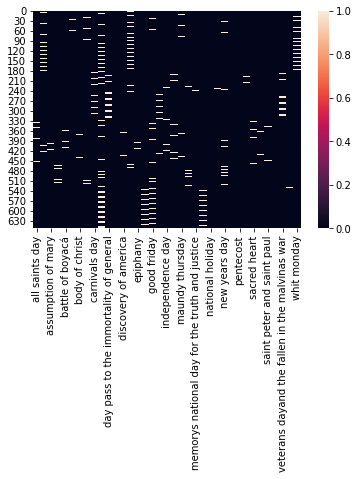

In [256]:
sns.heatmap(pd.get_dummies(holi['holiday_cleaned_final']))